<a href="https://colab.research.google.com/github/coderanandmaurya/K-means-clustering/blob/main/Hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans

# Generate sample data
X, y = make_blobs(n_samples=100, centers=3, random_state=42)

In [2]:
# Compute the linkage matrix for Agglomerative Clustering
Z = linkage(X, method='ward')

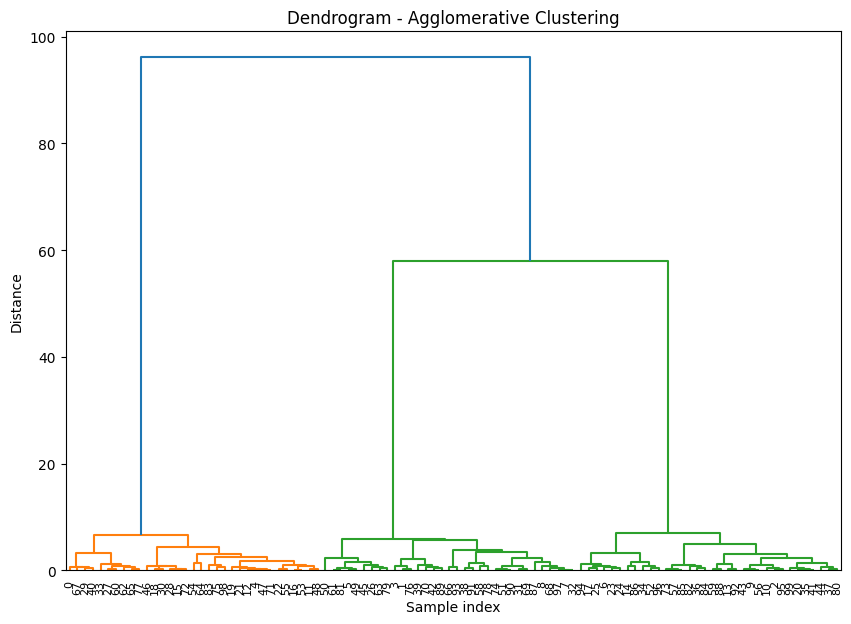

In [3]:
# Plot the dendrogram for visualization
plt.figure(figsize=(10, 7))
plt.title("Dendrogram - Agglomerative Clustering")
plt.xlabel("Sample index")
plt.ylabel("Distance")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()

In [4]:
# Apply Agglomerative Clustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


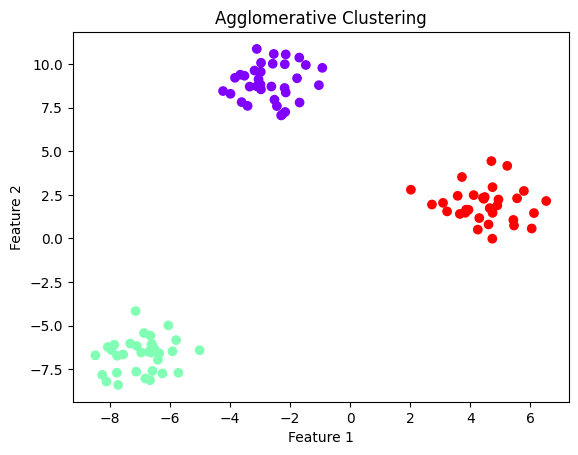

In [5]:
# Visualize the clusters obtained from Agglomerative Clustering
plt.scatter(X[:, 0], X[:, 1], c=y_hc, cmap='rainbow')
plt.title("Agglomerative Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [6]:
def divisive_clustering(X, n_clusters):
    clusters = [(X, np.arange(X.shape[0]))]
    while len(clusters) < n_clusters:
        new_clusters = []
        for cluster_data, cluster_indices in clusters:
            kmeans = KMeans(n_clusters=2, random_state=42)
            kmeans.fit(cluster_data)
            labels = kmeans.labels_
            new_clusters.append((cluster_data[labels == 0], cluster_indices[labels == 0]))
            new_clusters.append((cluster_data[labels == 1], cluster_indices[labels == 1]))
        clusters = new_clusters
    return np.concatenate([indices for _, indices in clusters])

In [7]:
# Generate sample data (reused)
X, y = make_blobs(n_samples=100, centers=3, random_state=42)


In [10]:
# Apply Divisive Clustering
y_dc = divisive_clustering(X, n_clusters=3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


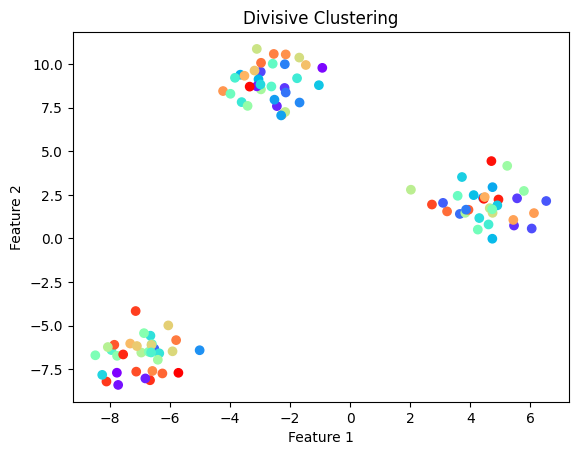

In [11]:
# Visualize the clusters obtained from Divisive Clustering
plt.scatter(X[:, 0], X[:, 1], c=y_dc, cmap='rainbow')
plt.title("Divisive Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
